In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-time-a-multi-factor-dataset/Food_Time_Data_Set.csv


# **Import**

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [101]:
df = pd.read_csv('/kaggle/input/food-delivery-time-a-multi-factor-dataset/Food_Time_Data_Set.csv')

## **Data Description**
* ID: A unique identifier for each delivery instance, used to distinguish individual records.
* Delivery_person_ID: A unique identifier assigned to each delivery person for tracking purposes.
* Delivery_person_Age: Age of the delivery person, potentially influencing delivery efficiency.
* Delivery_person_Ratings: Customer ratings for the delivery person, reflecting performance and service quality.
* Restaurant_latitude: Geographical latitude coordinate of the restaurant's location.
* Restaurant_longitude: Geographical longitude coordinate of the restaurant's location.
* Delivery_location_latitude: Latitude coordinate of the delivery location where the order is delivered.
* Delivery_location_longitude: Longitude coordinate of the delivery location for the order.
* Type_of_order: Category of food ordered (e.g., meal, snacks ,drinks,buffet) to analyze preparation times.
* Type_of_vehicle: The vehicle used for delivery (e.g., scooter , motor cycyle , cycle ,ev scooter), which affects speed and travel time.
* Temperature: Ambient temperature during the delivery time, potentially impacting delivery efficiency.
* Humidity: Level of atmospheric moisture during delivery, affecting conditions for travel.
* Precipitation: Amount of rainfall or snow, indicating weather disruptions during delivery.
* Weather_description: Textual description of the weather (e.g., sunny, cloudy, stormy) for context in travel conditions.
* Traffic_Level: Severity of traffic congestion during the delivery (e.g., low, medium, high).
* Distance (km): The calculated distance between the restaurant and the delivery location in kilometers.
* TARGET: The target variable representing the delivery time in minutes for model predictions.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,10000.0,29.522000,5.700348,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,10000.0,4.629370,0.322941,1.000000,4.500000,4.700000,4.800000,6.000000
Restaurant_latitude,10000.0,16.893418,8.330948,-30.902872,12.913041,18.546258,22.727021,30.914057
Restaurant_longitude,10000.0,70.177749,23.203352,-88.352885,73.170937,75.902847,78.047717,88.433452
Delivery_location_latitude,10000.0,17.412655,7.336846,0.010000,12.983959,18.626216,22.785089,31.054057
Delivery_location_longitude,10000.0,70.880072,21.174585,0.010000,73.753278,76.022574,78.128092,88.563452
temperature,9995.0,22.936907,3.379448,6.770000,20.140000,23.000000,25.980000,29.050000
humidity,9995.0,66.164882,15.602939,27.000000,54.000000,67.000000,81.000000,94.000000
precipitation,9995.0,0.016233,0.074911,0.000000,0.000000,0.000000,0.000000,1.460000
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Missing Value & Duplicate Value Check**

In [104]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,ID,1
1,Delivery_person_ID,1
2,Delivery_person_Age,1
3,Delivery_person_Ratings,1
4,Restaurant_latitude,1
5,Restaurant_longitude,1
6,Delivery_location_latitude,1
7,Delivery_location_longitude,1
8,Type_of_order,1
9,Type_of_vehicle,1


In [105]:
df.duplicated().sum()

0

In [106]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


# **2. Data Transfrom for Visuailization**

In [107]:
#NA Remove
df = df.drop(columns=['Unnamed: 14'])
df = df.dropna()

In [108]:
#Target value data type conversion Object -> float
df['TARGET'] = df['TARGET'].astype(float)

## **Data Check**

In [109]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
9995,4347,MUMRES07DEL01,25.0,4.0,19.091458,72.827808,19.101458,72.837808,Meal,motorcycle,28.03,57.0,0.0,smoke,Low,3.78,18.200000
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,High,18.92,32.616667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,Low,2.64,12.016667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,Very High,28.80,51.066667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,High,17.63,43.800000


# **3. Data Visualization**

In [110]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).drop(columns = ['ID', 'Delivery_person_ID']).columns

In [111]:
num_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'TARGET'],
      dtype='object')

In [112]:
cat_cols

Index(['Type_of_order', 'Type_of_vehicle', 'weather_description',
       'Traffic_Level'],
      dtype='object')

## **Histogram**

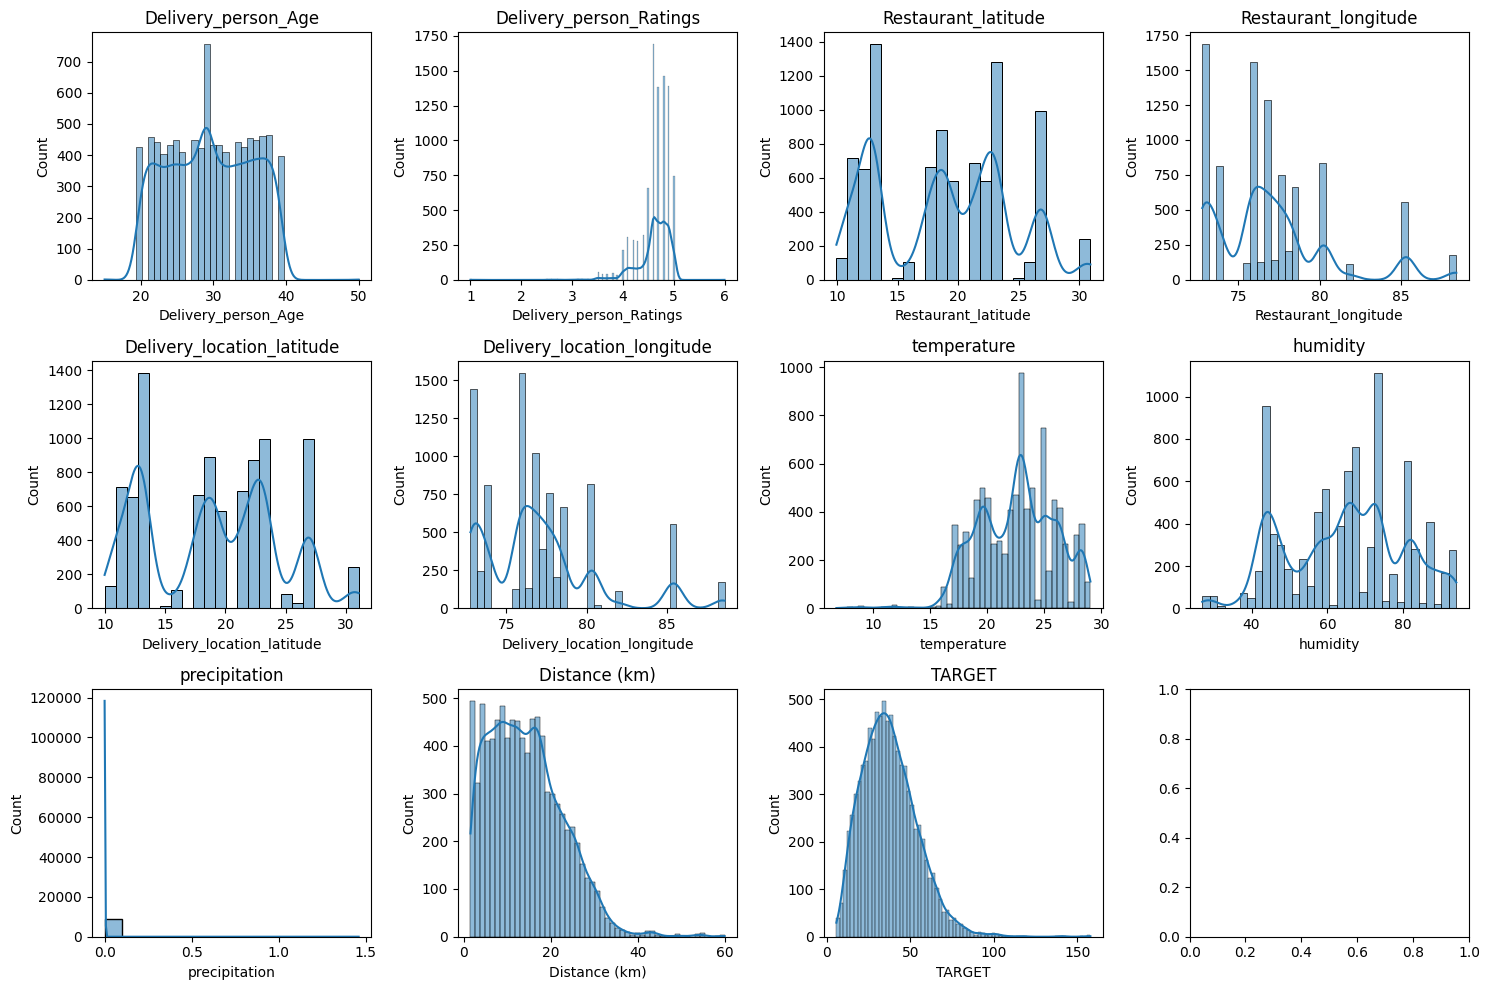

In [113]:
f, ax = plt.subplots(3,4, figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

## **Boxplot**

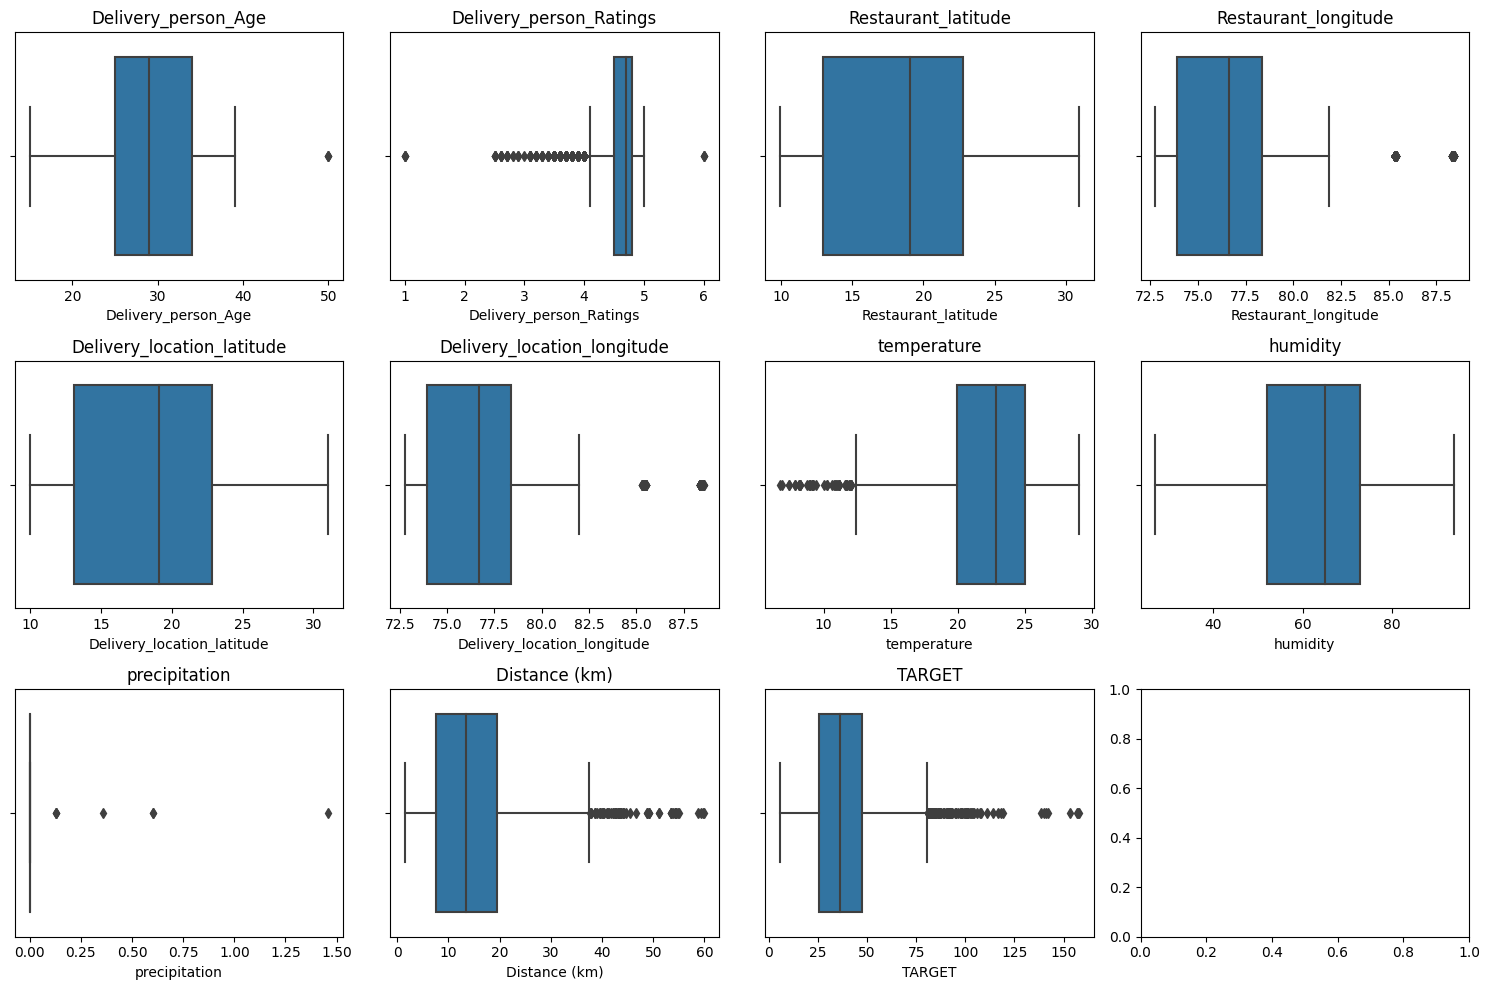

In [114]:
f, ax = plt.subplots(3,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

## **CountPlot**

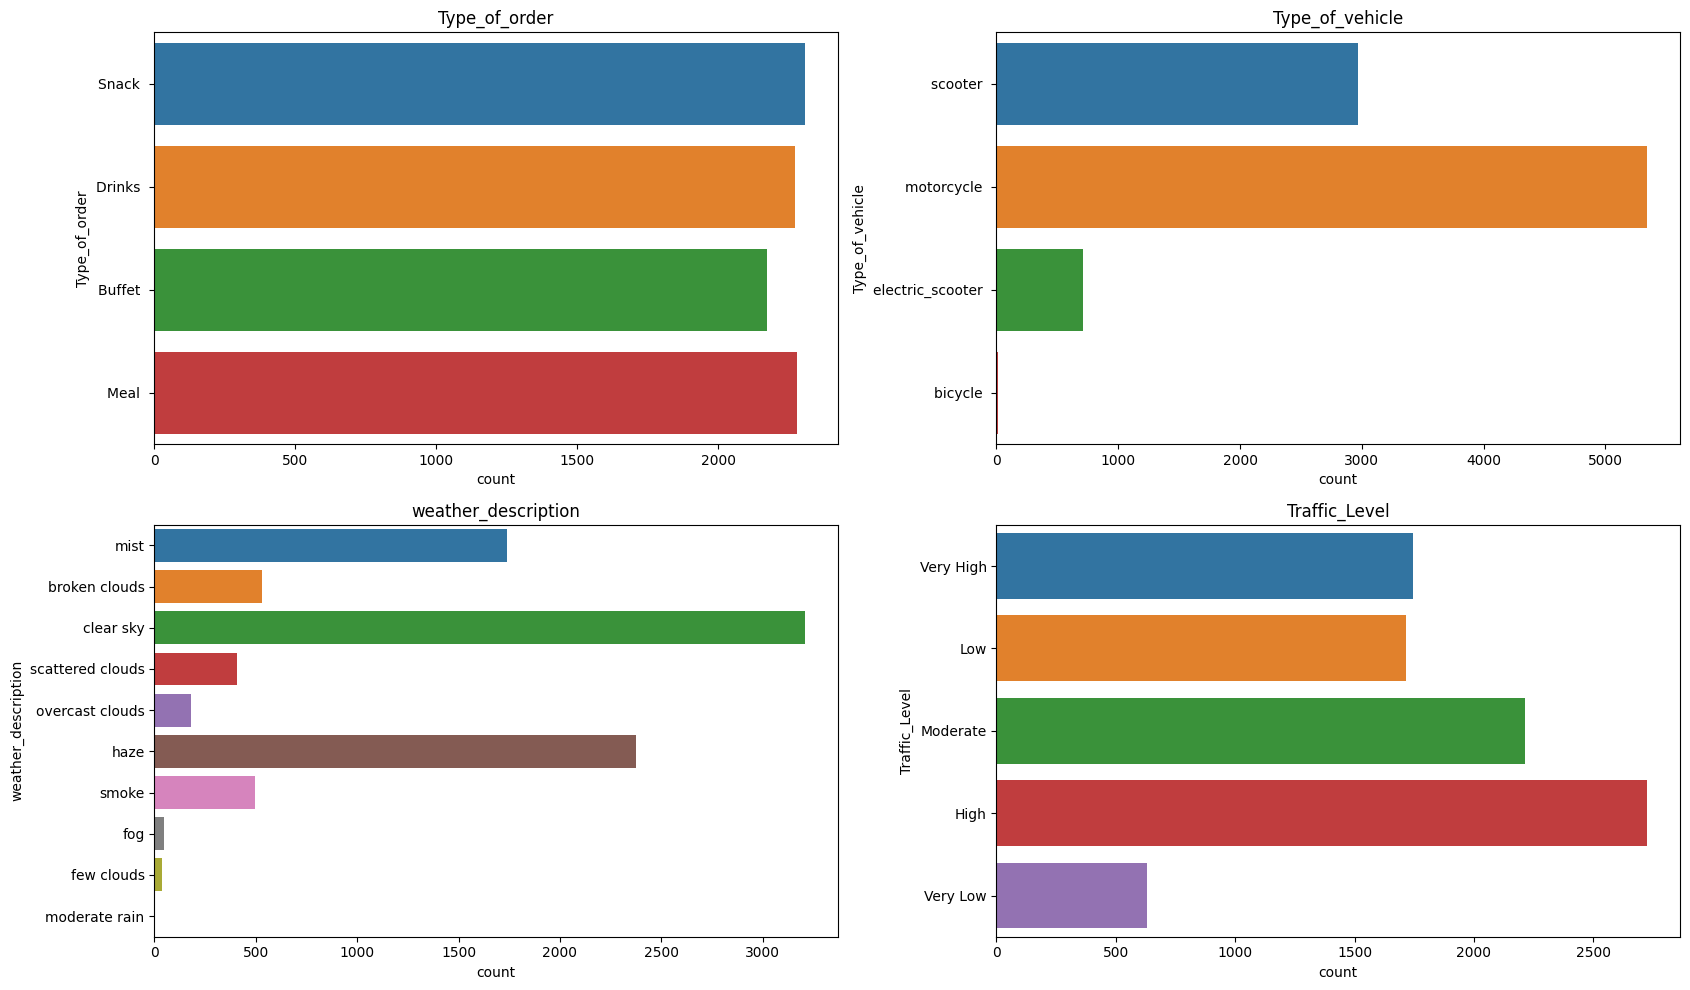

In [115]:
f, ax = plt.subplots(2,2 , figsize=(17,10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(df, y= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

## **Correlation**

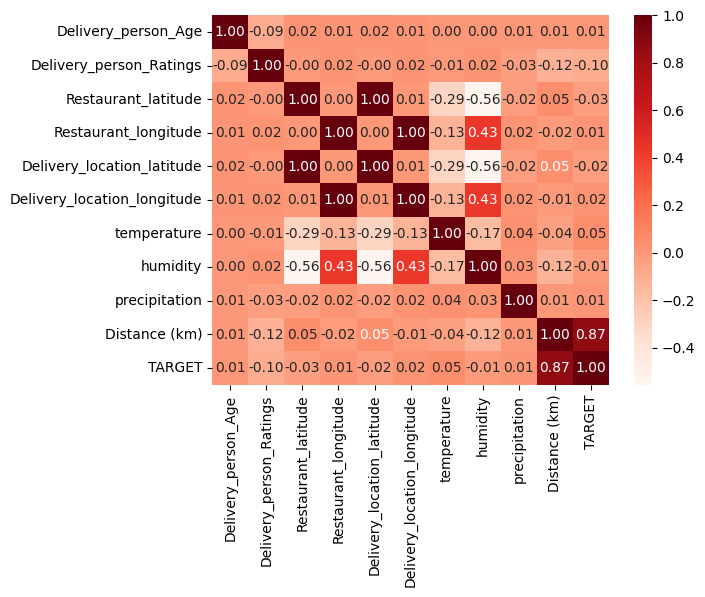

In [116]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

## **Scatterplot**

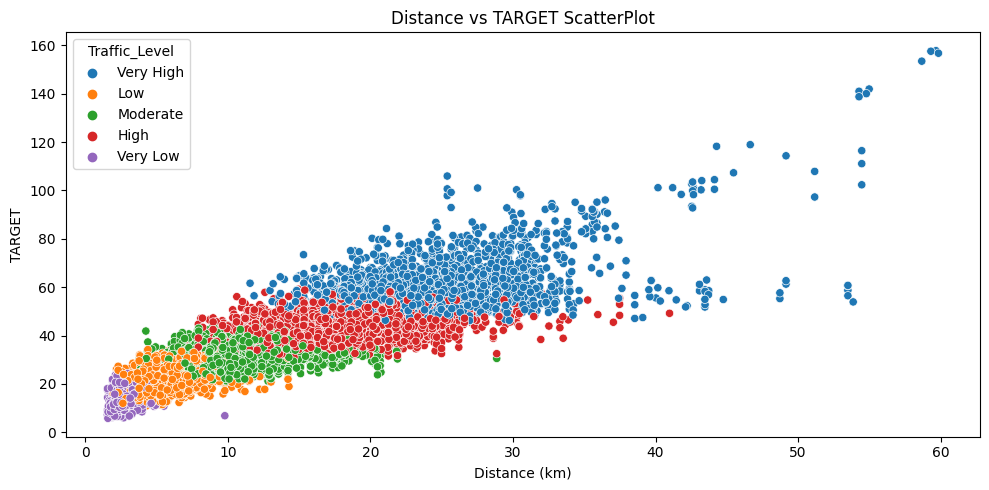

In [117]:
plt.subplots(figsize=(10,5))
sns.scatterplot(df, x='Distance (km)', y='TARGET', hue='Traffic_Level')
#sns.regplot(df, x='Distance (km)', y='TARGET')
plt.title('Distance vs TARGET ScatterPlot')
plt.tight_layout()
plt.show()

# **4. Modeling**

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

## **Data Preprocessing**

In [119]:
Feature = df.select_dtypes(include = ['int64','float64','object']).drop(columns = ['ID','Delivery_person_ID']).columns

In [120]:
Feature

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

In [121]:
df = df[Feature]

## **LabelEncoding**

In [122]:
label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Type_of_order
0 -> Buffet 
1 -> Drinks 
2 -> Meal 
3 -> Snack 

Column: Type_of_vehicle
0 -> bicycle 
1 -> electric_scooter 
2 -> motorcycle 
3 -> scooter 

Column: weather_description
0 -> broken clouds
1 -> clear sky
2 -> few clouds
3 -> fog
4 -> haze
5 -> mist
6 -> moderate rain
7 -> overcast clouds
8 -> scattered clouds
9 -> smoke

Column: Traffic_Level
0 -> High
1 -> Low
2 -> Moderate
3 -> Very High
4 -> Very Low



## **StandardScale**

In [126]:
X = df.drop(columns=['TARGET'])
y = df[['TARGET']]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size= 0.2)

In [129]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **ML**

In [131]:
rfc = RandomForestRegressor()
lnr = LinearRegression()
rid = Ridge(alpha=1.0)
las = Lasso(alpha=1.0)

models = [rfc, lnr, rid, las]

names = ["Random Forest", "Linear Regression","Ridge","Lasso"]

In [132]:
index = 0
mse_ = []
r2_ = []
mae_ = []
rmse_ = []

for name, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(f'{names[index]}')
    
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    
    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    
    index += 1

Random Forest
MSE:  13.539088007208717
RMSE:  3.679549973462613
MAE:  2.5225460431267295
r2:  0.9454998652557954
--------------------------------------------------
Linear Regression
MSE:  62.185979533270476
RMSE:  7.8858087431328485
MAE:  5.698896123504048
r2:  0.7175728926883935
--------------------------------------------------
Ridge
MSE:  61.440907688723286
RMSE:  7.838425077062565
MAE:  5.713236066118986
r2:  0.7200809042434818
--------------------------------------------------
Lasso
MSE:  63.85851658750728
RMSE:  7.991152394211193
MAE:  5.862687096569908
r2:  0.6534925938540809
--------------------------------------------------


## **Evaulation**

In [137]:
reg_df = pd.DataFrame({'Model': names, 'MSE': mse_, 'RMSE':rmse_ ,'MAE': mae_ ,'R2 Score': r2_})
reg_df['MSE'] = round(reg_df['MSE'],4)
reg_df['RMSE'] = round(reg_df['RMSE'],4)
reg_df['MAE'] = round(reg_df['MAE'],4)
reg_df['R2 Score'] = round(reg_df['R2 Score'],4)

In [138]:
reg_df

,Model,MSE,RMSE,MAE,R2 Score
0,Random Forest,13.5391,3.6795,2.5225,0.9455
1,Linear Regression,62.1860,7.8858,5.6989,0.7176
2,Ridge,61.4409,7.8384,5.7132,0.7201
3,Lasso,63.8585,7.9912,5.8627,0.6535


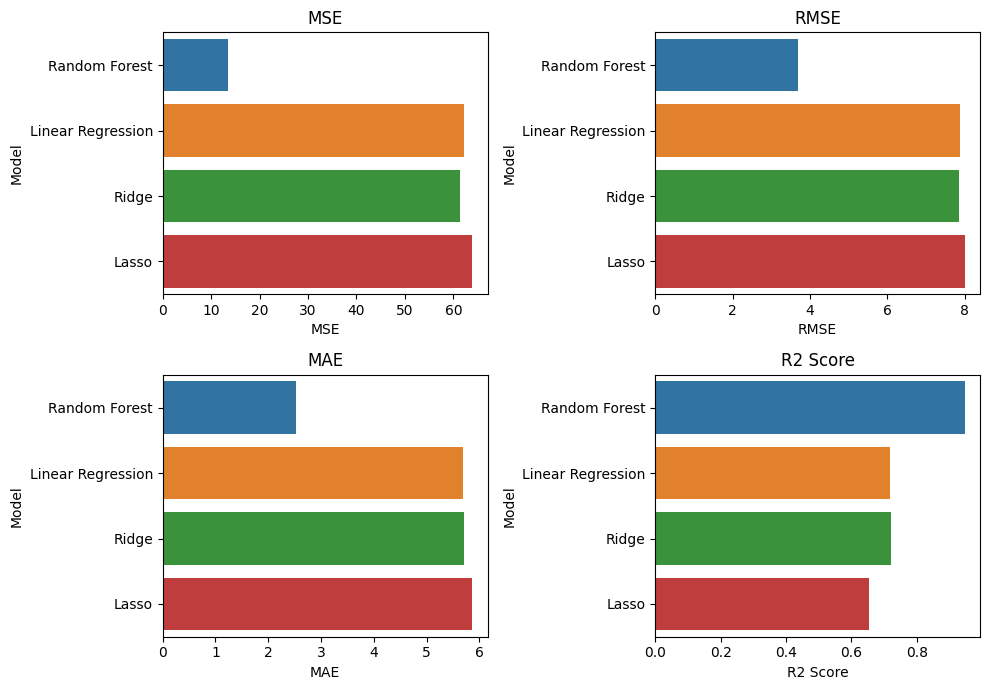

In [139]:
md_cols = ['MSE','RMSE','MAE','R2 Score']
f, ax = plt.subplots(2,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(md_cols):
    sns.barplot(data = reg_df, x= cols, y = 'Model', ax = ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show() 

* **The best model is RandomForest Model. Because MSE, RMSE, and MAE are the lowest**

## **Feature Importance**

In [133]:
#Select RF model

sorted_idx = (-rfc.feature_importances_).argsort()
list_of_tuples = list(zip(X.columns[sorted_idx],
                           rfc.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','feature importance'])
feat_importance

,feature,feature importance
0,Distance (km),6.596947e-01
1,Traffic_Level,2.212555e-01
2,Type_of_order,3.905994e-02
3,temperature,2.479280e-02
4,Restaurant_latitude,9.531840e-03
5,weather_description,8.530260e-03
6,Delivery_location_latitude,8.480012e-03
7,Delivery_location_longitude,7.121591e-03
8,Restaurant_longitude,5.966646e-03
9,humidity,5.939339e-03


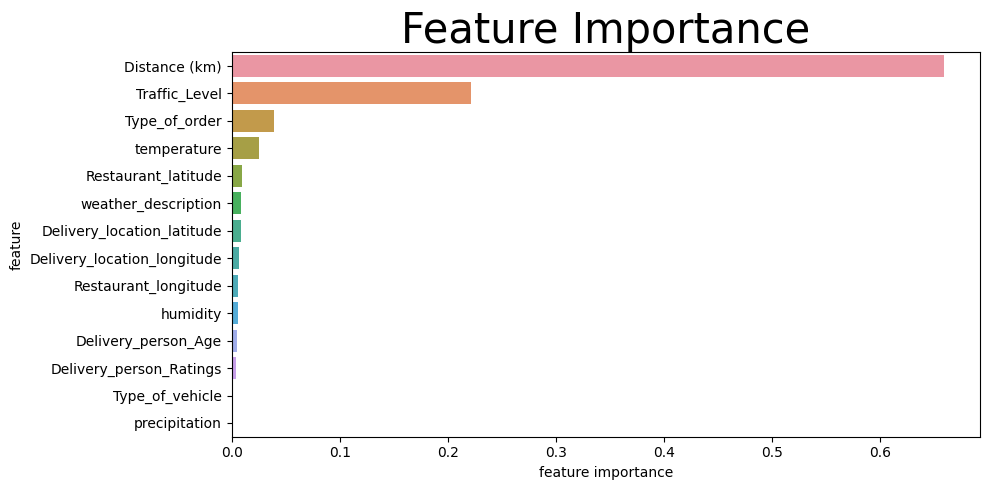

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(feat_importance,y= 'feature',x='feature importance')

plt.title('Feature Importance',fontsize=30)
plt.tight_layout()
plt.show()

**Thankyou. Please leave your advice in the comments.**